In [115]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import json
import pylab
df = pd.read_json("NEW1.json")

In [116]:
df2 = pd.DataFrame(columns=['accountId', 'gameId', 'champion', 'queue', 'role', 'lane']) #Loading in all the data for player matches.
for x in df['matches']:
    for y in x['matches']:
        df2 = df2.append({'accountId' : x['id'], 'gameId' : y['gameId'], 'champion' : y['champion'], 'queue' : y['queue'], 'role' : y['role'], 'lane' : y['lane']}, ignore_index=True)
df2

,accountId,gameId,champion,queue,role,lane
0,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3308031084,54,400,DUO_SUPPORT,NONE
1,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3308000913,11,400,NONE,JUNGLE
2,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3307948985,11,400,NONE,JUNGLE
3,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3307945900,86,440,DUO,TOP
4,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3307953104,103,440,SOLO,MID
...,...,...,...,...,...,...
30678,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3294280112,67,420,SOLO,TOP
30679,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3294108831,245,420,NONE,JUNGLE
30680,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3294126729,67,420,SOLO,TOP
30681,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3293678396,63,420,DUO_SUPPORT,BOTTOM


I didn't add platformId becasue they are all going to be 'NA', season because they are all going to be '13', and timestamp because it is irrelevant.

In [196]:
df2 = df2[df2['role'] != 'NONE']
df2 = df2[df2['lane'] != 'NONE']
df2

,accountId,gameId,champion,queue,role,lane
3,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3307945900,86,440,DUO,TOP
4,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3307953104,103,440,SOLO,MID
5,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3307390165,875,400,SOLO,TOP
6,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3304803027,875,700,SOLO,TOP
7,32IMRWEYLQmSJQU1yghWuO9DxJqhnLNzDDzj_Zi1Lz4un6s,3304763662,82,700,DUO,BOTTOM
...,...,...,...,...,...,...
30677,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3294252338,67,420,SOLO,TOP
30678,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3294280112,67,420,SOLO,TOP
30680,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3294126729,67,420,SOLO,TOP
30681,J_PsYmqHjLBj3DcsBk5Rcbz0UQu937CihR84yjOo5w5-pC...,3293678396,63,420,DUO_SUPPORT,BOTTOM


I removed empty data. When lane is 'jungle' role is 'none', but sometimes when the lane was not jungle, role was still 'none' so I just removed the jungle lane as well. Looking at top, mid, and bottom is good enough.

In [197]:
histData = df2.groupby("champion")['queue'].count()
histData

champion
1       75
2       27
3       49
4       74
5       17
      ... 
517    220
518    113
523    275
555    221
875    393
Name: queue, Length: 148, dtype: int64

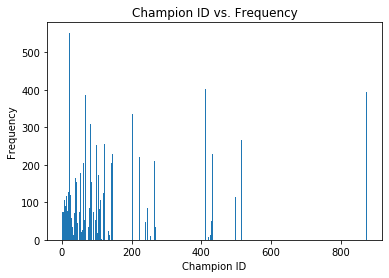

In [200]:
count = df2.champion.nunique()
first_digits = df2.champion
first_digits = first_digits.sort_values()
pylab.hist(first_digits, bins = 875)
pylab.title("Champion ID vs. Frequency")
pylab.xlabel("Champion ID")
pylab.ylabel("Frequency")
pylab.show()

As seen by the histrogram above, There are about 4 champions that get played significantly more than others and another 7 that get played more than even those. This results from certain champions being stronger on different patches so some champions are going to be picked more because they are just better.

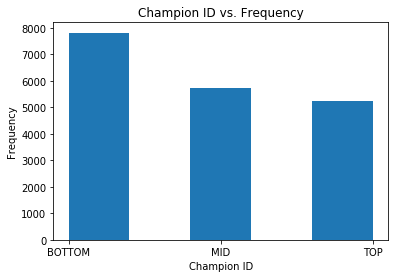

In [199]:
histData = df2.groupby("lane")['queue'].count()
count = df2.champion.nunique()
first_digits = df2.lane
first_digits = first_digits.sort_values()
pylab.hist(first_digits, bins = 5)
pylab.title("Champion ID vs. Frequency")
pylab.xlabel("Champion ID")
pylab.ylabel("Frequency")
pylab.show()

Bottom may seem to have more play rate than mid and top, but that is because it includes both support and ADC, which are both roles that are in the bottom lane. This means that Mid and Top most likely have a greater frequency, but it cannot be shown in this graph.

In [63]:
df3 = pd.read_json("back2.json")

In [64]:
df3

,data
0,{'frames': [{'participantFrames': {'1': {'part...
1,{'frames': [{'participantFrames': {'1': {'part...
2,{'frames': [{'participantFrames': {'1': {'part...
3,{'frames': [{'participantFrames': {'1': {'part...
4,{'frames': [{'participantFrames': {'1': {'part...
...,...
993,{'frames': [{'participantFrames': {'1': {'part...
994,{'frames': [{'participantFrames': {'1': {'part...
995,{'frames': [{'participantFrames': {'1': {'part...
996,{'frames': [{'participantFrames': {'1': {'part...


In [65]:
df3['data'][0]['frames'][0]['participantFrames']['1']

{'participantId': 5,
 'position': {'x': 560, 'y': 581},
 'currentGold': 500,
 'totalGold': 500,
 'level': 1,
 'xp': 0,
 'minionsKilled': 0,
 'jungleMinionsKilled': 0,
 'dominionScore': 0,
 'teamScore': 0}

In [ ]:
df4 = pd.DataFrame(columns=['dataId', 'frameNo', 'participantId', 'currentGold', 'totalGold', 'level', 'xp', 'minionsKilled', 'jungleMinionsKilled'])
did = 0
fid = 0
for a in df3['data']:
    print(did)
    did = did + 1
    fid = 0
    for b in a['frames']:
        fid = fid + 1
        for c in b['participantFrames']:
            df4 = df4.append({'dataId' : did, 'frameNo' : fid, 'participantId' : b['participantFrames'][c]['participantId'], 'currentGold' : b['participantFrames'][c]['currentGold'], 'totalGold' : b['participantFrames'][c]['totalGold'], 'level' : b['participantFrames'][c]['level'], 'xp' : b['participantFrames'][c]['xp'], 'minionsKilled' : b['participantFrames'][c]['minionsKilled'], 'jungleMinionsKilled' : b['participantFrames'][c]['jungleMinionsKilled']}, ignore_index=True)

In [71]:
df4

,dataId,frameNo,participantId,currentGold,totalGold,level,xp,minionsKilled,jungleMinionsKilled
0,1,1,5,500,500,1,0,0,0
1,1,1,3,500,500,1,0,0,0
2,1,1,1,500,500,1,0,0,0
3,1,1,4,500,500,1,0,0,0
4,1,1,2,500,500,1,0,0,0
...,...,...,...,...,...,...,...,...,...
271765,998,31,9,742,13687,15,14359,219,13
271766,998,31,8,667,14450,15,13584,52,153
271767,998,31,6,1540,10250,15,13072,156,8
271768,998,31,10,1265,10015,13,11298,152,23


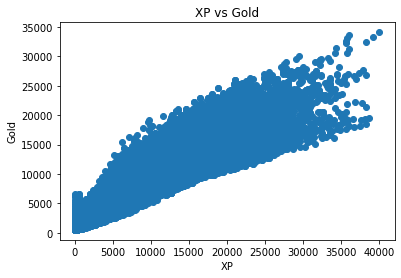

In [130]:
fig=plt.figure()
plt.scatter(df4.xp, df4.totalGold)
axis = fig.gca() #get current axis
axis.set_title('XP vs Gold')
axis.set_xlabel('XP')
axis.set_ylabel('Gold')
fig.canvas.draw()

As seen in the graph above, as the amount of xp increases the amount the gold increases and it is mostly linear. This makes sense because as the game goes on you will gain xp and your gold will increase because you get passive gold and by killing minions, monsters, objectives, or champions.
The begining however has a rectangle at the start. I believe that is because of people who "AFK" which essentially means they have internet problems and can't load into the game, left the game on purpose, or can't load in for a reason out of their control. This means they will gain the passive
gold the game gives them but will not recieve any experience because they are not near anayhting that is dying whether it be minions, monsters, or creeps.

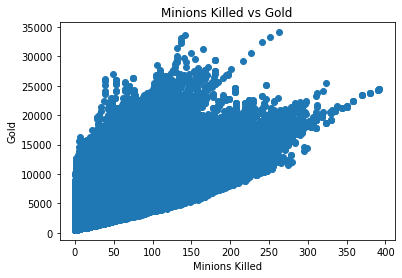

In [202]:
fig=plt.figure()
plt.scatter(df4.minionsKilled, df4.totalGold)
axis = fig.gca() #get current axis
axis.set_title('Minions Killed vs Gold')
axis.set_xlabel('Minions Killed')
axis.set_ylabel('Gold')
fig.canvas.draw()

This graph, as compared to the last graph, is mless linear. This is because you need to farm minions to get gold which makes sense that when the minions killed columns goes up then the gold amount goes up. However, it is not linear because killing enemy champions and objectives do not show up in the minions killed score, so it isn't linear. The graph more or less shows that the most kills happen around the 100-150 minions killed mark which makes sense becuase this is around the time "laning phase" ends in a game and the players' focus changes from killing minions to get gold and xp to fighting enemy chammpions for control over objectives and the map. Less experienced players will start to kill less minions during this time and that is why the gold goes high in this timeframe. Going into graphing this data I thought it would still be linear even with champion kills, but it does make sense that it is not because of the reasons described.

In [131]:
df5 = pd.read_json("NEW3.json")

In [132]:
df5

,data
0,"[{'championId': 67, 'championLevel': 7, 'champ..."
1,"[{'championId': 157, 'championLevel': 7, 'cham..."
2,"[{'championId': 64, 'championLevel': 7, 'champ..."
3,"[{'championId': 236, 'championLevel': 7, 'cham..."
4,"[{'championId': 161, 'championLevel': 7, 'cham..."
...,...
1653,"[{'championId': 63, 'championLevel': 7, 'champ..."
1654,"[{'championId': 498, 'championLevel': 7, 'cham..."
1655,"[{'championId': 37, 'championLevel': 7, 'champ..."
1656,"[{'championId': 35, 'championLevel': 6, 'champ..."


In [134]:
df6 = pd.DataFrame(columns=['summonerId', 'championId', 'championLevel', 'championPoints'])
for j in df5['data']:
        for k in j:
            df6 = df6.append({'summonerId' : k['summonerId'], 'championId': k['championId'], 'championLevel' : k['championLevel'], 'championPoints' : k['championPoints']}, ignore_index=True)

I skip ChampionPointsSinceLastLevel, championPointsUntilNextLevel, chestGranted, and tokensEarned because that information is irrelevant.

In [136]:
df6

,summonerId,championId,championLevel,championPoints
0,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,67,7,978485
1,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,81,7,183592
2,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,236,7,156228
3,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,157,7,125910
4,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,238,7,62700
...,...,...,...,...
175695,WQuRdhUSoXf_eDA2xh3nnrzVTOauAZ8s42jc-kc6IbNrPlk,11,1,146
175696,WQuRdhUSoXf_eDA2xh3nnrzVTOauAZ8s42jc-kc6IbNrPlk,142,1,115
175697,WQuRdhUSoXf_eDA2xh3nnrzVTOauAZ8s42jc-kc6IbNrPlk,85,1,105
175698,WQuRdhUSoXf_eDA2xh3nnrzVTOauAZ8s42jc-kc6IbNrPlk,91,1,98


In [137]:
df6 = df6[df6.championLevel > 4]

I got rid of champion masteries less than 5. To get rank 6 or 7 on a champion you have to get S-, S, or S+ grades in game on the champion to level it up.

In [138]:
df6

,summonerId,championId,championLevel,championPoints
0,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,67,7,978485
1,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,81,7,183592
2,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,236,7,156228
3,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,157,7,125910
4,slM1hw-pMDh5sd1c_DX1xaTrVTDVYx1csPc-WSceT-DDf8s,238,7,62700
...,...,...,...,...
175522,Jrr4LfmAQYAfrKbC7nXnsESZQYcO33059BivgdKOIwI1V8k,89,7,66551
175523,Jrr4LfmAQYAfrKbC7nXnsESZQYcO33059BivgdKOIwI1V8k,17,6,50269
175524,Jrr4LfmAQYAfrKbC7nXnsESZQYcO33059BivgdKOIwI1V8k,2,5,45565
175525,Jrr4LfmAQYAfrKbC7nXnsESZQYcO33059BivgdKOIwI1V8k,412,6,32925


All the columns in this dataframe were of type object and then I tried to switch the championPoints column to int64's and I got errors, but they somehow changed to int64's so I have no code for how I got it to work, but it somehow worked. So if you were to retry running this code you would have to figure out how to fix it.

In [229]:
temp = df6.groupby('championLevel')['championPoints'].mean()
temp

championLevel
5     35028.994270
6     50589.348827
7    128050.103366
Name: championPoints, dtype: float64

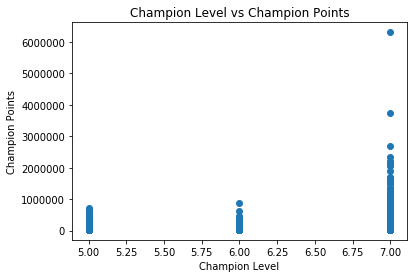

In [236]:
fig=plt.figure()
plt.scatter(df6.championLevel, df6.championPoints)
axis = fig.gca() #get current axis
axis.set_title('Champion Level vs Champion Points')
axis.set_xlabel('Champion Level')
axis.set_ylabel('Champion Points')
fig.canvas.draw()

For championLevel 5 and 6 the points are close, because it only takes two s- grade games to upgrade to level 6 so someone who is mastery 5 shouldn't have too hard of a time. For level 7, it is the highest level so those are for mostly the people who like to "main" which means only play that champ or people who just like playing the champion semi regularly. Which makes sense that the scores will on average be higher with the outliers at the 400,000 and 600,000 ish marks because those are players that probably play that campion in 90%+ of their games. There are also people who don't upgrade their levels and have a lot of points but it doesn't seem to be any in this datapool.

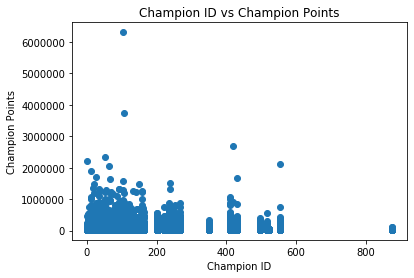

In [238]:
fig=plt.figure()
plt.scatter(df6.championId, df6.championPoints)
axis = fig.gca() #get current axis
axis.set_title('Champion ID vs Champion Points')
axis.set_xlabel('Champion ID')
axis.set_ylabel('Champion Points')
fig.canvas.draw()

The point spread is relatively even except for the outliers of high champion points for champions shown. 

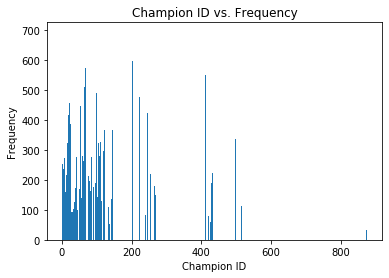

In [241]:
first_digits = df6.championId
first_digits = first_digits.sort_values()
pylab.hist(first_digits, bins = 875)
pylab.title("Champion ID vs. Frequency")
pylab.xlabel("Champion ID")
pylab.ylabel("Frequency")
pylab.show()

There are some champions that have more players with points on those champions compared to others. There are some champions that are more popular because they are more fun, strong, or "flashy". I know the champion with the id 875 is a new champion that came out less than a month ago so there are going to be less players who have played that champion. This distribution looks normal to me and is what I expected.